In [1]:
import numpy as np
import pandas as pd
try:
    from skmisc.loess import loess
except ImportError:
    from util import loess
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Now, we can load the data at data.csv and turn it into the predictor X and the target y

In [16]:
# X is contained in the first column of the data, y in the second.
data = pd.read_csv('data.csv')
X=data.iloc[:,:1]
y=data.iloc[:,1:2]

Create a scatterplot of the data. 

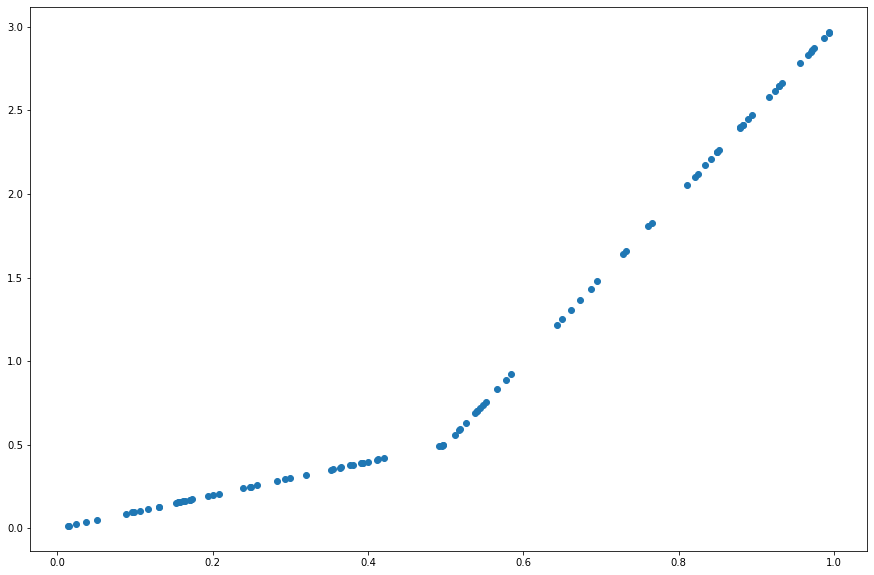

In [32]:
plt.scatter(X, y)
plt.show()

The variables have a linear relationship, till one point we have a linear relationship with a particular slope and after the point we have a linear relationship with a different slope.

We now define the kernels $K_1,...,K_4$ as

In [88]:
import math

def K1(x, x_):
    return 1

def K2(x, x_, lam):
    return (1-((abs((x - x_)/lam))**3))**3    

def K3(x, x_, lam):
    return math.exp((-lam)*((abs(x - x_))**2))

def K4(x, x_, L):
    sum=0
    for l in range(1, L):
        if (((l-1)/L)<= x and ((l-1)/L)<= x_ and (1/L)>x and (1/L)>x_):
            sum= sum +1
    if(sum==0):
        return 0
    else:
        return 1
    

To write the function which takes $X, y$ and a kernel $K$ as input, we can do the following

In [90]:
def pred(X, y, K):
    from sklearn.metrics.pairwise import pairwise_kernels
    # Start by computing the matrix of all weights we'll need at once.
    X_data=X[X.columns[0]].values.tolist()

    w1 = np.zeros((99,99))
    w2 = np.zeros((99,99))
    w3 = np.zeros((99,99))
    w4 = np.zeros((99,99))

    for i in range(len(X_data)):
        for j in range(len(X_data)):
            w1[i][j]=K1(X_data[i],X_data[j])
            w2[i][j]=K2(X_data[i],X_data[j],1)
            w3[i][j]=K3(X_data[i],X_data[j],1)
            w4[i][j]=K4(X_data[i],X_data[j],2)    
    
    # Now, for each point we can compute the model using the corresponding weights, and make a prediction.
    X_val=np.array(X_data)
    yhat1 = X_val.T * (w1 * X_data).I * (X_val.T * (w1 * y.T))
    yhat2 = X_val.T * (w2 * X_data).I * (X_val.T * (w2 * y.T))
    yhat3 = X_val.T * (w3 * X_data).I * (X_val.T * (w3 * y.T))
    yhat4 = X_val.T * (w4 * X_data).I * (X_val.T * (w4 * y.T))
    
    # Return a vector of the predictions at each point in X.
    return y_hat

To actually use this function and show the fits of each kernel, we can iterate over all the kernels and fit the LOESS model for each of them.

NameError: name 'K1' is not defined

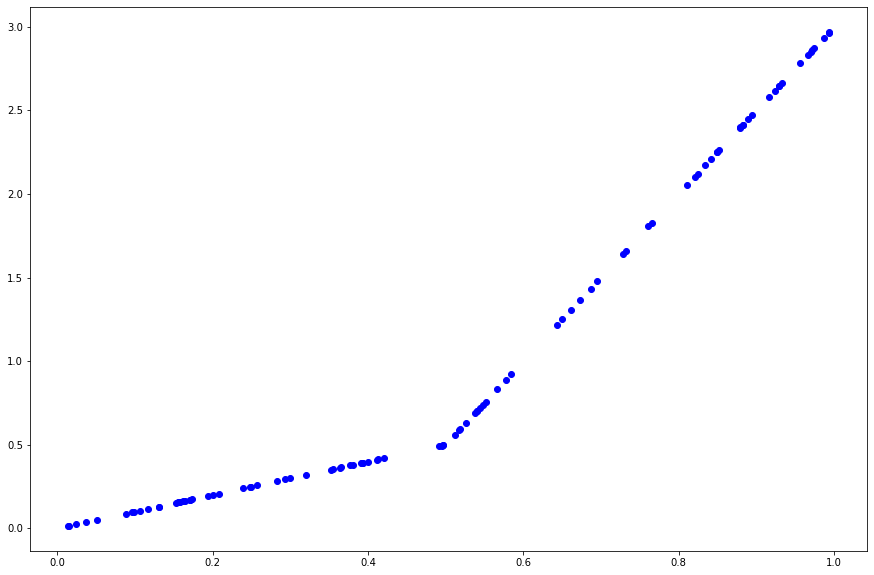

In [18]:
from functools import partial # You may want to use this to make your life easier.
plt.scatter(X, y, c='b')
for kernel in [K1, K2, K3, K4]:
    loess()
    
# Adding a legend so we know which kernel produced what is good style.
plt.legend()

We see...